In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df= pd.read_csv("house_prices.csv")

def convert_amount(value):
    try:
        value= value.strip().lower().replace(",","")
        if 'cr' in value:
            return float(value.replace('cr','').strip())*1e7
        elif 'lac' in value:
            return float(value.replace('lac',''))*1e5
        else:
            return float(value)

    except:
        return np.nan
df['Amount_cleaned']= df['Amount(in rupees)'].apply(convert_amount)

            
print(df.head())
print(df.info()) 

   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0    than

In [3]:
def convert_amount(value):
    try:
        value = value.strip().lower().replace(",", "")
        if 'cr' in value:
            return float(value.replace('cr', '').strip()) * 1e7
        elif 'lac' in value:
            return float(value.replace('lac', '').strip()) * 1e5
        else:
            return float(value)
    except:
        return None

df['Amount_cleaned'] = df['Amount(in rupees)'].apply(convert_amount)
df[['Amount(in rupees)', 'Amount_cleaned']].head()


,Amount(in rupees),Amount_cleaned
0,42 Lac,4200000.0
1,98 Lac,9800000.0
2,1.40 Cr,14000000.0
3,25 Lac,2500000.0
4,1.60 Cr,16000000.0


In [5]:
def extract_sqft(area):
    try:
        return float(area.lower().replace('sqft', '').strip())
    except:
        return None

df['Carpet_cleaned'] = df['Carpet Area'].apply(extract_sqft)
df[['Carpet Area', 'Carpet_cleaned']].head()


,Carpet Area,Carpet_cleaned
0,500 sqft,500.0
1,473 sqft,473.0
2,779 sqft,779.0
3,530 sqft,530.0
4,635 sqft,635.0


In [7]:
# Step 3: Convert 'Carpet Area' to numeric (remove 'sqft')
def extract_sqft(area):
    try:
        return float(area.lower().replace('sqft', '').strip())
    except:
        return None

df['Carpet_cleaned'] = df['Carpet Area'].apply(extract_sqft)

# See before and after
print(df[['Carpet Area', 'Carpet_cleaned']].head())


  Carpet Area  Carpet_cleaned
0    500 sqft           500.0
1    473 sqft           473.0
2    779 sqft           779.0
3    530 sqft           530.0
4    635 sqft           635.0


In [9]:
# Convert Bathroom and Balcony to numeric (ignore errors and set invalid ones to NaN)
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')
df['Balcony'] = pd.to_numeric(df['Balcony'], errors='coerce')

# Check the result
print(df[['Bathroom', 'Balcony']].dtypes)
print(df[['Bathroom', 'Balcony']].head())


Bathroom    float64
Balcony     float64
dtype: object
   Bathroom  Balcony
0       1.0      2.0
1       2.0      NaN
2       2.0      NaN
3       1.0      1.0
4       2.0      NaN


In [11]:
# Keep only the cleaned, necessary columns
final_df = df[['Carpet_cleaned', 'Bathroom', 'Balcony', 'Amount_cleaned']].dropna()

# Show first few rows
print(final_df.head())

# Optional: How many records are left?
print("Total cleaned rows:", len(final_df))


    Carpet_cleaned  Bathroom  Balcony  Amount_cleaned
0            500.0       1.0      2.0       4200000.0
3            530.0       1.0      1.0       2500000.0
9            900.0       3.0      1.0      16000000.0
13          1820.0       4.0      1.0      42500000.0
15           675.0       2.0      1.0       9000000.0
Total cleaned rows: 89213


In [13]:
from sklearn.model_selection import train_test_split

# Features (Input) and Target (Output)
X = final_df[['Carpet_cleaned', 'Bathroom', 'Balcony']]
y = final_df['Amount_cleaned']

# Split into Train and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check sizes
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 71370
Testing samples: 17843


In [15]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Show model coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2, b3):", model.coef_)


Intercept (b0): -16860757.23239921
Coefficients (b1, b2, b3): [2.57497548e+02 1.03843326e+07 1.86329139e+06]


In [19]:
# Predict prices for the test set
y_pred = model.predict(X_test)

# Show first 5 predictions vs actual
predicted_vs_actual = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
print(predicted_vs_actual.head())


   Actual Price  Predicted Price
0     8300000.0     7.861089e+06
1     8500000.0     7.866238e+06
2     6500000.0     7.788989e+06
3     5230000.0     7.866238e+06
4    15600000.0     9.845404e+06


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 113781963388446.25
R² Score: 0.4824147694229677


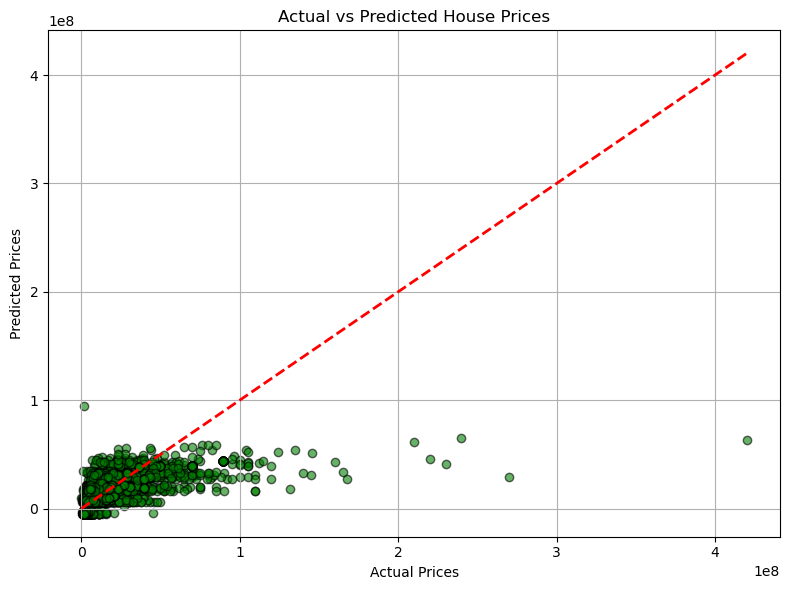

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', edgecolor='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
